<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_290~319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05. 회귀
**01 회귀 소개**
* 회귀(regression): 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법. 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
* Y = W1X1 + W2X2 + W3X3 + ... + WnXn에서 Y는 종속변수, X는 독립변수를 의미. W는 이 독립변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)
* 머신러닝에서 독립변수는 피처에 해당하고, 종속변수는 결정 값
* 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
* 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있음. 또 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉨
* 분류와 회귀의 차이: 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값
* 선형 회귀: 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
* 규제: 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것
* 대표적인 선형 회귀 모델
 * 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
 * 릿지(Ridge): 선형 회귀에 L2 규제를 추가한 회귀 모델.
 * 라쏘(Lasso): 선형 회귀에 L1 규제를 적용한 방식. 피처 선택 기능으로도 불림
 * 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델
 * 로지스틱 회귀(Logistic Regression): 분류에 적용되는 선형 모델

**02 단순 선형 회귀를 통한 회귀 이해**
* 단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀
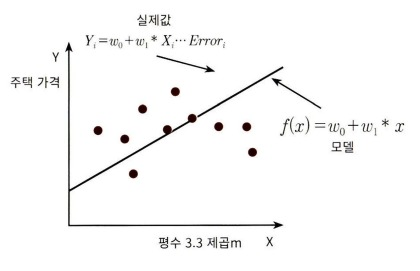

* 예측값: $\hat{Y}$ = w0 + w1*X
* 기울기 w1과 절편(intercept) w0을 회귀 계수로 지칭
* 잔차: 실제 값과 회귀 모델의 차이에 따른 오류
* 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미 = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미
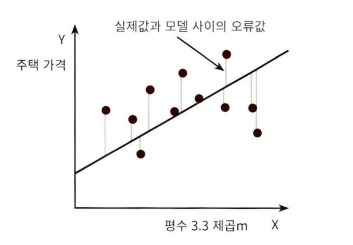


* 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취함
* 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구함.
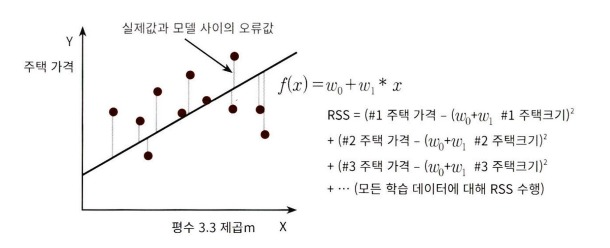

* RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요
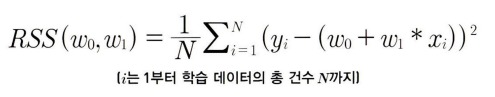

* RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수(손실 함수)라고 함
* 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

**03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**
* 경사 하강법: "점진적으로" 반복적인 계산을 통해 W 파라미터 값을 업데이터하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
* w 파라미터 개수에 따라 매우 복잡해지는 고차원 방정식을 푸는 것보다 훨씬 더 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있음
* 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
* 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w 값을 최적 파라미터로 반환
* 예를 들어 비용 함수가 포물선 형태의 2차 함수라면 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이터함. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환함
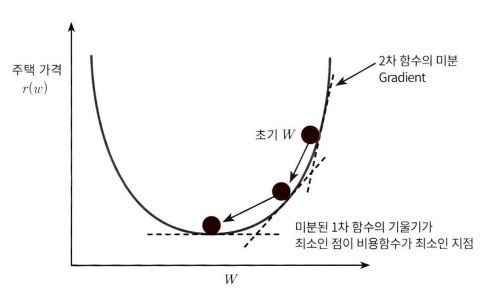

* R(w)는 변수가 w 파라미터로 이뤄진 함수이며, R(w) = ∑(yi - (w0 + w1 * xi))^2
* R(w)는 두 개의 파라미터인 w0과 w1을 가지고 있기 때문에 일반적인 미분을 적용할 수가 없고, w0, w1 각 변수에 편미분을 적용해야 함

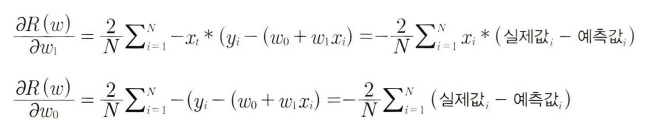




* w1, w0의 편미분 결괏값을 반복적으로 보정하면서 w1, w0 값을 업데이터하면 비용 함수 R(w)가 최소가 되는 w1, w0을 구할 수 있음
* 업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스(-)하면서 적용함
* 위 편미분 값이 너무 클 수 있기 때문에 보정 계수 η를 곱하는데, 이를 "학습률"이라고 함
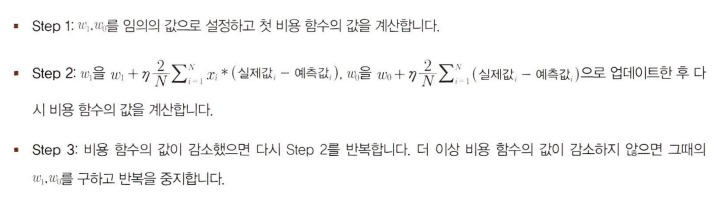

* 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있음
* 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용.
* 확률적 경사 하강법: 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사하강법에 비해서 빠른 속도를 보장함

* 피처가 M개(X1, X2,...,X100) 있다면 그에 따른 회귀 계수도 M+1(1개는 w0)개로 도출됨
즉, $\hat{Y}$ = w0 + w1*X1 + w2*X2 + ... + w100*X100과 같이 예측 회귀식을 만들 수 있음.
* 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2,...,w100을 W 배열로 표기하면 예측 행렬 $\hat{Y}$ = np.dot(Xmat, Wt) + w0로 구할 수 있음.
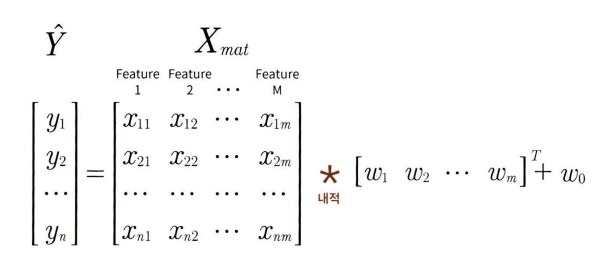

* w0를 weight의 배열인 w안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat0을 추가
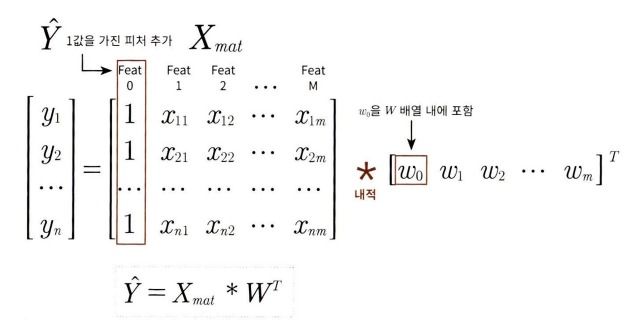

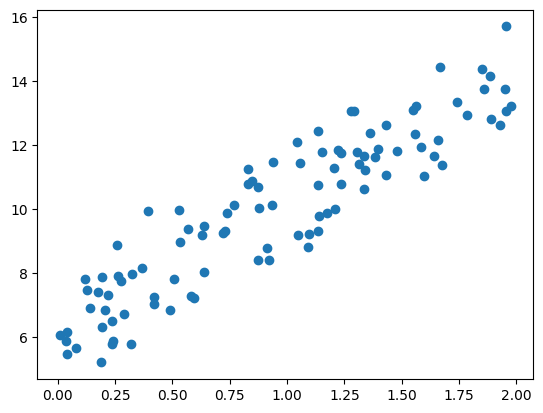

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

In [3]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(X.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters = 10000):
  # w0과 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1: {0:.3f} w0: {1: 3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print("Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.950 w0:  4.949528
Gradient Descent Total Cost: 1.4314


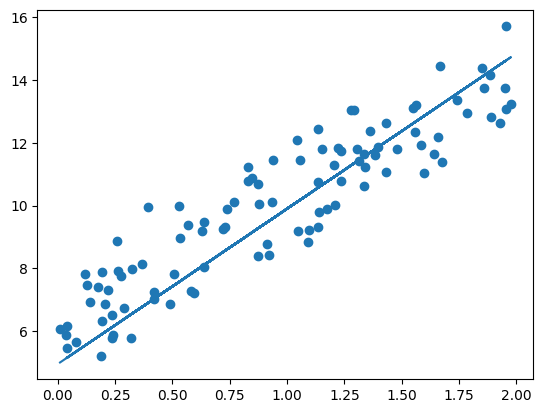

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1: ", round(w1[0, 0], 3), "w0: ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print("Stochastic Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1:  4.948 w0:  4.948
Stochastic Gradient Descent Total Cost: 1.4327


**05 다항 회귀와 과(대)적합/과소적합 이해)**

다항 회귀 이해
* 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
* y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2와 같이 표현
* 다항 회귀는 선형 회귀. 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지를 따른 것이지 독립변수의 선형/비선형 여부와는 무관함
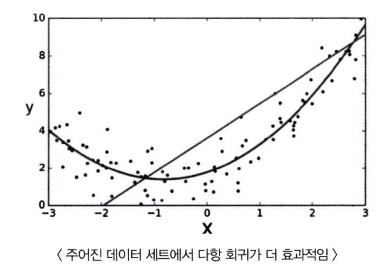

* 다항 회귀를 위한 클래스를 명시적으로 제공하지 않아 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함
* 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환


In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피처:\n", X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [12]:
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

X = np.arange(4).reshape(2, 2)
print("일차 단항식 개수 feature: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값: \n", y)

일차 단항식 개수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [14]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print("3차 다항식 계수 feature: \n", poly_ftr)

from sklearn.linear_model import LinearRegression
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수\n", np.round(model.coef_, 2))
print("Polynomial 회귀 Shape: ", model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([("poly", PolynomialFeatures(degree = 3)),
                  ("linear", LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print("Polynomial 회귀 계수\n", np.round(model.named_steps["linear"].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


다항 회귀를 이용한 과소적합 및 과적합 이해
* 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐 → 과적합 문제가 크게 발생

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 것입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다
Degree 15 MSE는 181238256.56423894 입니다.


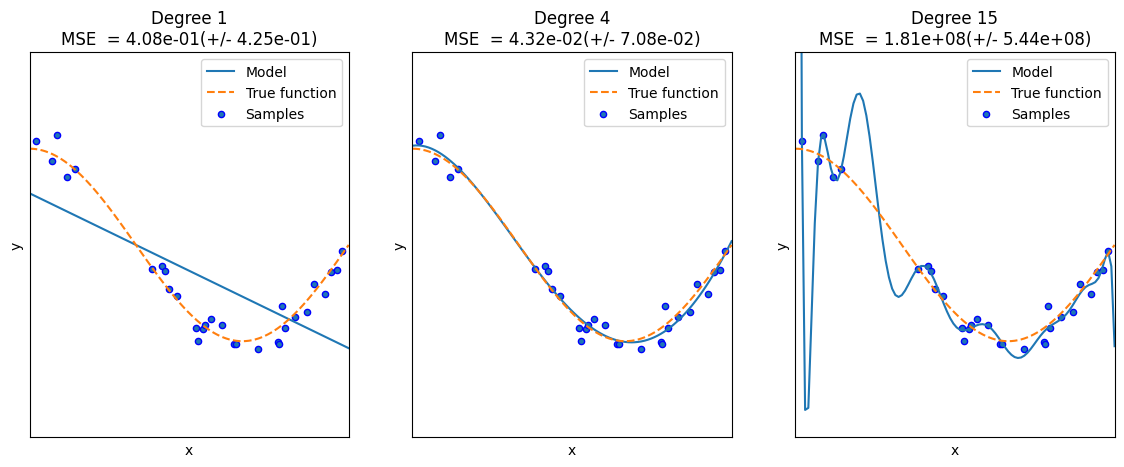

In [45]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks = (), yticks = ())

  # 개별 degree별로 Polynomial 변환합니다
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps["객체명"]을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps["linear_regression"].coef_
  print("\nDegree {0} 회귀 계수는 {1} 입니다".format(degrees[i], np.round(coefficients, 2)))
  print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model")
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), "--", label = "True function")
  plt.scatter(X, y, edgecolor = "b", s = 20, label = "Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc = "best")
  plt.title("Degree {}\nMSE  = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

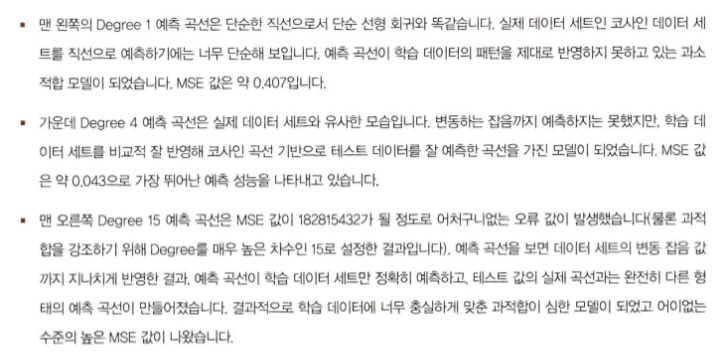

편향 - 분산 트레이드오프(Bias - Variance Trade off)
* 앞의 Degree1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있음.이런 모델을 고편향(High Bias)성을 가졌다고 표혀함.
* Decree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게됨. 이런 모델을 고분산(High Variance)성을 가졌다고 표현함.
* 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아짐(과적합)

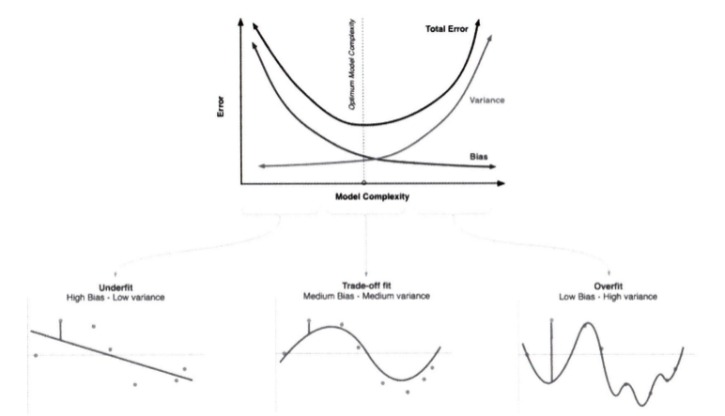

* 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉬움.
* 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 에측 모델을 만드는 방법.